<a href="https://colab.research.google.com/github/ali-workshop/Research-Paper/blob/main/mypaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#download all data sets from kaggle

In [ ]:
!pip install opendatasets

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
import opendatasets as od
# 6463b4d76523a3d511aadcdd9df378ec

In [ ]:
od.download("https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15")

Skipping, found downloaded files in "./unsw-nb15" (use force=True to force download)


In [ ]:
od.download("https://www.kaggle.com/datasets/hassan06/nslkdd")

Skipping, found downloaded files in "./nslkdd" (use force=True to force download)


In [ ]:
od.download("https://www.kaggle.com/datasets/liuwoo/botiot-2018")

Skipping, found downloaded files in "./botiot-2018" (use force=True to force download)


In [ ]:
od.download("https://www.kaggle.com/datasets/cicdataset/cicids2017/data")

Skipping, found downloaded files in "./cicids2017" (use force=True to force download)


#read UNSW_B15 dataset

In [ ]:
data_UNSW_NB15=pd.read_csv("/content/unsw-nb15/UNSW_NB15_training-set.csv")

In [ ]:
data_UNSW_NB15.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


#read BOT_IOT DATA set

In [ ]:
data_BOT_IOT=pd.read_csv("/content/botiot-2018/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")

In [ ]:
data_BOT_IOT.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


#read NSL-KDD data set

In [ ]:
data_NSL = pd.read_csv("/content/nslkdd/KDDTrain+.txt")

In [ ]:
data_NSL.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


#read CICIDS dataset

In [ ]:
data_CICIDS= pd.read_csv('/content/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')


In [ ]:
data_CICIDS.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


#start with NUSW-NB15 dataset

In [ ]:
data_UNSW_NB15.shape

(82332, 45)

In [ ]:
data_UNSW_NB15.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


In [ ]:
data_UNSW_NB15.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,...,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,...,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,...,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,NaN,1.000000


<Axes: xlabel='attack_cat'>

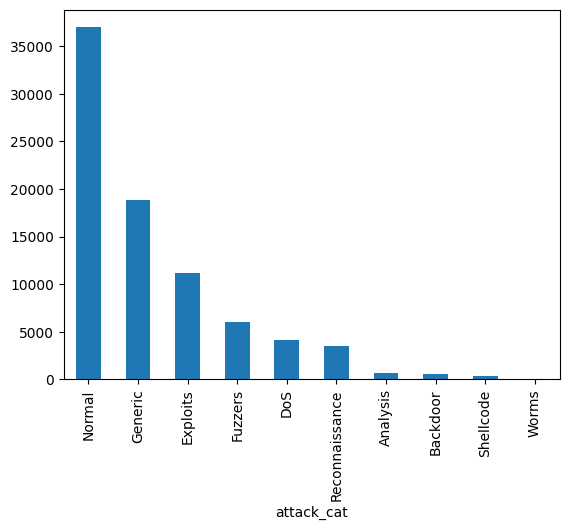

In [ ]:
data_UNSW_NB15['attack_cat'].value_counts().plot.bar()

In [ ]:
data_UNSW_NB15["attack_cat"].unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [ ]:
data_UNSW_NB15["label"].unique()

array([0, 1])

#our approach

In [ ]:
data_UNSW_NB15.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [ ]:
object_columns = data_UNSW_NB15.select_dtypes(include=['object']).columns

# Drop the object columns
data_UNSW_NB15 = data_UNSW_NB15.drop(columns=object_columns)


In [ ]:
data_UNSW_NB15.dtypes

id                     int64
dur                  float64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
is_ftp_login  

In [ ]:
data_UNSW_NB15.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [ ]:
len(data_UNSW_NB15.columns)

41

<Axes: >

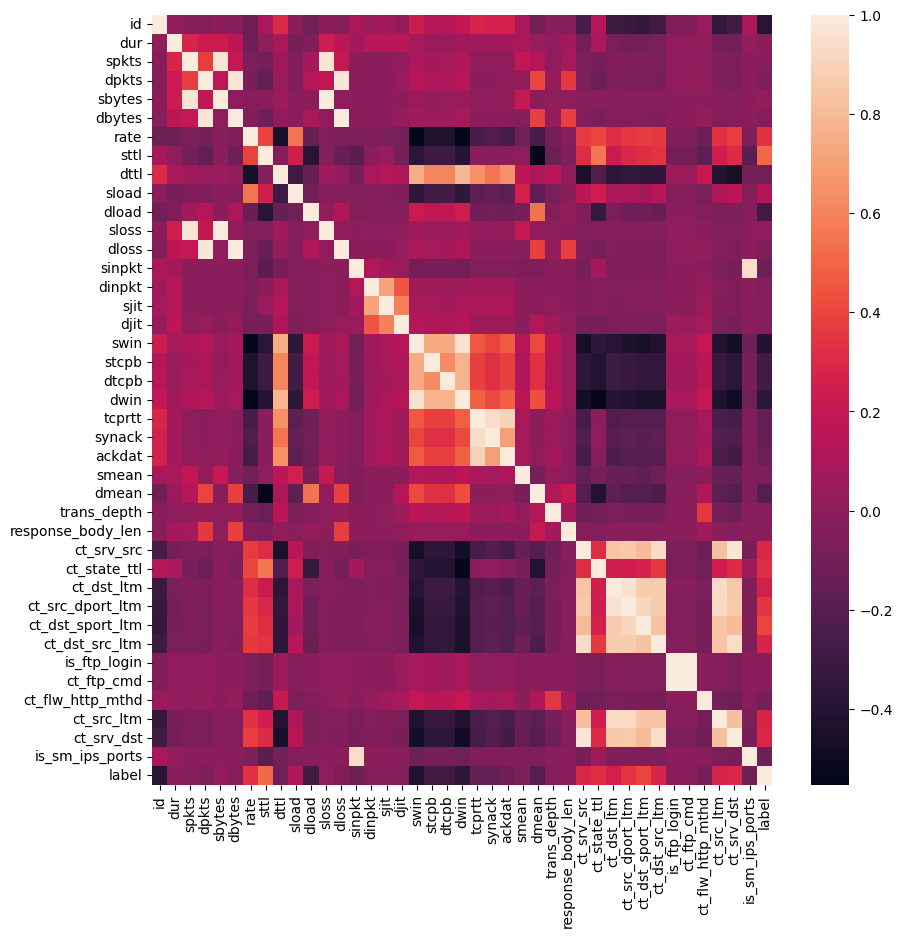

In [ ]:
#Exploration
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
sns.heatmap(data_UNSW_NB15.corr(), annot = False)

In [ ]:
# Segregating the Feature and Target
X = data_UNSW_NB15.drop("label", axis=1).values
y = data_UNSW_NB15["label"].values

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (65865, 40)
Shape of Test Features: (16467, 40)
Shape of Train Target: (65865,)
Shape of Test Target: (16467,)


In [ ]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.798e+03, tolerance: 1.630e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.806e+03, tolerance: 1.629e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.810e+03, tolerance: 1.630e

Best Params {'alpha': 1e-05}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.511e+03, tolerance: 2.037e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
names=data_UNSW_NB15.drop("label", axis=1).columns
print("Column Names: {}".format(names.values))

Column Names: ['id' 'dur' 'spkts' 'dpkts' 'sbytes' 'dbytes' 'rate' 'sttl' 'dttl' 'sload'
 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt' 'sjit' 'djit' 'swin' 'stcpb'
 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat' 'smean' 'dmean' 'trans_depth'
 'response_body_len' 'ct_srv_src' 'ct_state_ttl' 'ct_dst_ltm'
 'ct_src_dport_ltm' 'ct_dst_sport_ltm' 'ct_dst_src_ltm' 'is_ftp_login'
 'ct_ftp_cmd' 'ct_flw_http_mthd' 'ct_src_ltm' 'ct_srv_dst'
 'is_sm_ips_ports']


In [ ]:
len(names)

40

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Assuming X_train is your training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# import numpy as np
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error

# # Load the Boston Housing dataset
# boston = datasets.load_boston()
# X = boston.data
# y = boston.target

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Define the objective function
# def objective_function(params):
#     c, gamma, epsilon = params
#     svr = SVR(C=c, gamma=gamma, epsilon=epsilon)
#     svr.fit(X_train, y_train)
#     y_pred = svr.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     return mse

# # Define the bounds for each hyperparameter
# lower_bound = [1e-3, 1e-3, 1e-3]
# upper_bound = [10, 10, 10]

# # Define the PSO algorithm
# n_particles = 10
# n_dimensions = 3
# max_iter = 50
# w = 0.9
# c1 = 0.5
# c2 = 0.3

# # Define the PSO function
# def pso(objective_function, lower_bound, upper_bound, n_particles, n_dimensions, max_iter, w, c1, c2):
#     # Initialize the particles randomly within the search space
#     particles = np.random.uniform(low=lower_bound, high=upper_bound, size=(n_particles, n_dimensions))

#     # Initialize the personal best positions and global best position
#     personal_best_positions = particles
#     global_best_position = particles[np.argmin([objective_function(p) for p in particles])]

#     # Initialize the velocities
#     velocities = np.zeros((n_particles, n_dimensions))

#     # Perform optimization
#     for i in range(max_iter):
#         # Update the velocities
#         r1 = np.random.rand(n_particles, n_dimensions)
#         r2 = np.random.rand(n_particles, n_dimensions)
#         velocities = w * velocities + c1 * r1 * (personal_best_positions - particles) + c2 * r2 * (global_best_position - particles)

#         # Update the positions
#         particles = particles + velocities

#         # Enforce the bounds
#         particles = np.clip(particles, lower_bound, upper_bound)

#         # Update the personal best positions and global best position
#         for j in range(n_particles):
#             if objective_function(particles[j]) < objective_function(personal_best_positions[j]):
#                 personal_best_positions[j] = particles[j]
#             if objective_function(personal_best_positions[j]) < objective_function(global_best_position):
#                 global_best_position = personal_best_positions[j]

#     return global_best_position

# # Call the PSO function with the specified hyperparameters
# hyperparameters = pso(objective_function, lower_bound, upper_bound, n_particles, n_dimensions, max_iter, w, c1, c2)

# # Train the SVM model with the best hyperparameters
# c, gamma, epsilon = hyperparameters
# svr = SVR(C=c, gamma=gamma, epsilon=epsilon)
# svr.fit(X_train, y_train)

# # Evaluate the performance on the test set
# y_pred = svr.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


# Define the objective function for Lasso
def objective_function_lasso(params):
    alpha = params[0]
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Define the bounds for the hyperparameter (alpha) for Lasso
lower_bound_lasso = [1e-3]
upper_bound_lasso = [1]

# Define the PSO function
def pso(objective_function, lower_bound, upper_bound, n_particles, n_dimensions, max_iter, w, c1, c2):
    # Initialize the particles randomly within the search space
    particles = np.random.uniform(low=lower_bound, high=upper_bound, size=(n_particles, n_dimensions))

    # Initialize the personal best positions and global best position
    personal_best_positions = particles
    global_best_position = particles[np.argmin([objective_function(p) for p in particles])]

    # Initialize the velocities
    velocities = np.zeros((n_particles, n_dimensions))

    # Perform optimization
    for i in range(max_iter):
        # Update the velocities
        r1 = np.random.rand(n_particles, n_dimensions)
        r2 = np.random.rand(n_particles, n_dimensions)
        velocities = w * velocities + c1 * r1 * (personal_best_positions - particles) + c2 * r2 * (global_best_position - particles)

        # Update the positions
        particles = particles + velocities

        # Enforce the bounds
        particles = np.clip(particles, lower_bound, upper_bound)

        # Update the personal best positions and global best position
        for j in range(n_particles):
            if objective_function(particles[j]) < objective_function(personal_best_positions[j]):
                personal_best_positions[j] = particles[j]
            if objective_function(personal_best_positions[j]) < objective_function(global_best_position):
                global_best_position = personal_best_positions[j]

    return global_best_position
n_particles = 10
n_dimensions = 1
max_iter = 20
w = 0.9
c1 = 0.5
c2 = 0.3
# Call the PSO function with the specified hyperparameters for Lasso
hyperparameters_lasso = pso(objective_function_lasso, lower_bound_lasso, upper_bound_lasso, n_particles, n_dimensions, max_iter, w, c1, c2)


# Train the Lasso model with the best hyperparameters
alpha = hyperparameters_lasso[0]
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train)

# Evaluate the performance on the test set
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)

Mean Squared Error (Lasso): 0.09388136240504893


In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define the objective function for Lasso
def objective_function_lasso(alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Define the bounds for the hyperparameter (alpha) for Lasso
lower_bound_lasso = 1e-3
upper_bound_lasso = 10.1

# lower_bound_lasso = 1e-3
# upper_bound_lasso = 1.0

# Define the PSO function
def pso(objective_function, lower_bound, upper_bound, n_particles, max_iter, w, c1, c2, print_freq=10):
    # Initialize the particles randomly within the search space
    particles = np.random.uniform(low=lower_bound, high=upper_bound, size=(n_particles,))

    # Initialize the personal best positions and global best position
    personal_best_positions = particles.copy()
    global_best_position = particles[np.argmin([objective_function(p) for p in particles])]

    # Initialize the velocities
    velocities = np.zeros((n_particles,))

    # Perform optimization
    for i in range(max_iter):
        # Update the velocities
        r1 = np.random.rand(n_particles)
        r2 = np.random.rand(n_particles)
        velocities = w * velocities + c1 * r1 * (personal_best_positions - particles) + c2 * r2 * (global_best_position - particles)

        # Update the positions
        particles = particles + velocities

        # Enforce the bounds
        particles = np.clip(particles, lower_bound, upper_bound)

        # Update the personal best positions and global best position
        for j in range(n_particles):
            if objective_function(particles[j]) < objective_function(personal_best_positions[j]):
                personal_best_positions[j] = particles[j]
            if objective_function(personal_best_positions[j]) < objective_function(global_best_position):
                global_best_position = personal_best_positions[j]

        # Print best solution every 'print_freq' iterations
        # if (i + 1) % print_freq == 0:
        print("Iteration:", i, "| Best Solution:", global_best_position, "| MSE:", objective_function(global_best_position))

    return global_best_position

# Initialize data and parameters
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# n_particles = 5
# max_iter = 50
# w = 0.9
# c1 = 0.5
# c2 = 0.3


n_particles = 20
max_iter = 50
w = 1.0
c1 =1.0
c2 = 0.6

# Call the PSO function with the specified hyperparameters for Lasso
best_solution_lasso = pso(objective_function_lasso, lower_bound_lasso, upper_bound_lasso, n_particles, max_iter, w, c1, c2)



NameError: name 'X_train_scaled' is not defined

In [ ]:

# Train the Lasso model with the best hyperparameters
lasso = Lasso(alpha=best_solution_lasso)
lasso.fit(X_train_scaled, y_train)

# Evaluate the performance on the test set
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)

In [ ]:
hyperparameters_lasso

array([0.001])

In [ ]:
# # calling the model with the best parameter
# lasso1 = Lasso(alpha=0.019560) #alpha: 1e-05
# lasso1.fit(X_train_scaled, y_train)


In [ ]:

# Using np.abs() to make coefficients positive.
lasso_coef = np.abs(lasso.coef_)
len(lasso_coef)

40

In [ ]:
lasso_coef

array([0.77352444, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.10187603, 0.39762645, 0.42877914, 0.        ,
       0.2484388 , 0.        , 0.        , 0.07272588, 0.        ,
       0.        , 0.        , 0.86359481, 0.        , 0.        ,
       0.50626198, 0.51534526, 0.        , 0.        , 0.        ,
       0.43240749, 0.        , 0.        , 0.33608159, 0.84527016,
       0.        , 0.        , 0.49853645, 1.14397894, 0.        ,
       0.        , 0.        , 0.        , 0.38432808, 0.        ])

In [ ]:
len(names)

40

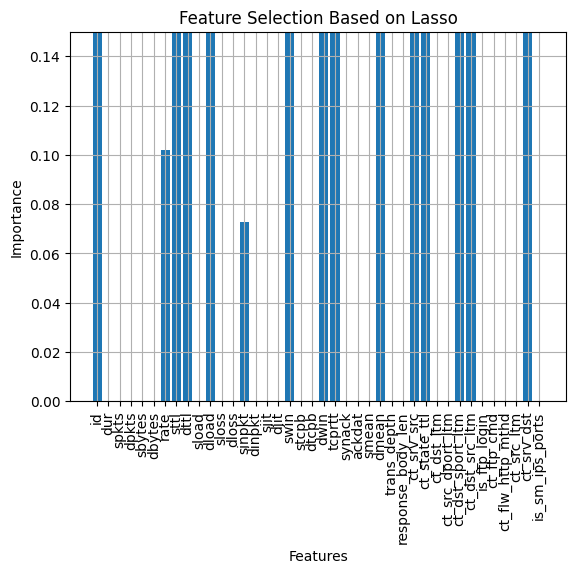

In [ ]:

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [ ]:
# Subsetting the features which has more than 0.001 importance.
feature_subset=np.array(names)[lasso_coef>0.01]
print("Selected Feature Columns: {}".format(feature_subset))

# Adding the target to the list of feaatures.
feature_subset=np.append(feature_subset, "label")
print("Selected Columns: {}".format(feature_subset))

Selected Feature Columns: ['id' 'rate' 'sttl' 'dttl' 'dload' 'sinpkt' 'swin' 'dwin' 'tcprtt' 'dmean'
 'ct_srv_src' 'ct_state_ttl' 'ct_dst_sport_ltm' 'ct_dst_src_ltm'
 'ct_srv_dst']
Selected Columns: ['id' 'rate' 'sttl' 'dttl' 'dload' 'sinpkt' 'swin' 'dwin' 'tcprtt' 'dmean'
 'ct_srv_src' 'ct_state_ttl' 'ct_dst_sport_ltm' 'ct_dst_src_ltm'
 'ct_srv_dst' 'label']


In [ ]:
len(feature_subset)

16

In [ ]:
df_new = data_UNSW_NB15[feature_subset]


In [ ]:
df_new.head()

,id,rate,sttl,dttl,dload,sinpkt,swin,dwin,tcprtt,dmean,ct_srv_src,ct_state_ttl,ct_dst_sport_ltm,ct_dst_src_ltm,ct_srv_dst,label
0,1,90909.0902,254,0,0.0,0.011,0,0,0.0,0,2,2,1,2,2,0
1,2,125000.0003,254,0,0.0,0.008,0,0,0.0,0,2,2,1,2,2,0
2,3,200000.0051,254,0,0.0,0.005,0,0,0.0,0,3,2,1,3,3,0
3,4,166666.6608,254,0,0.0,0.006,0,0,0.0,0,3,2,1,3,3,0
4,5,100000.0025,254,0,0.0,0.010,0,0,0.0,0,3,2,1,3,3,0


#compare pso whit this